In [1]:
import pandas as pd
from glob import glob
import os

In [2]:
class Environment:
    DATASET_DIR = '/workdir/dataset/'
    CASIA_ROOT = os.path.join(DATASET_DIR, 'CASIA-WebFace')

In [3]:
img_paths = glob(os.path.join(Environment.CASIA_ROOT, '*/*.jpg'))

In [4]:
from PIL import Image

In [5]:
p = img_paths[3]

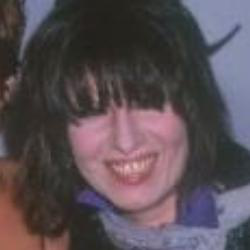

In [6]:
Image.open(p)

In [7]:
p

'/workdir/dataset/CASIA-WebFace/0005038/018.jpg'

In [8]:
p.split('/')[-2]

'0005038'

In [9]:
df_meta = pd.DataFrame(img_paths, columns=['img_path'])
df_meta['dir_name'] = [p.split('/')[-2] for p in img_paths]

In [10]:
import numpy as np

In [11]:
vc = df_meta.dir_name.value_counts()

In [12]:
use_dirnames = vc[vc > 100].index

In [13]:
use_dirnames = sorted(use_dirnames)

In [14]:
df_label = pd.DataFrame(use_dirnames, columns=['dir_name'])
df_label.index.name = 'label'
df_label = df_label.reset_index()

In [15]:
df_label

,label,dir_name
0,0,0000099
1,1,0000102
2,2,0000107
3,3,0000114
4,4,0000117
5,5,0000119
6,6,0000133
7,7,0000141
8,8,0000147
9,9,0000156


In [16]:
df_meta = pd.merge(df_meta, df_label, on='dir_name', how='right')

In [17]:
df_meta.to_csv(os.path.join(Environment.CASIA_ROOT, 'meta.csv'), index=False)

In [18]:
df_meta['dir_name'].unique()

array(['0001038', '1913734', '0000147', '1817835', '2829737', '0219835',
       '0919991', '1564087', '0329481', '1455681', '0002907', '2934314',
       '0680983', '0005516', '0000301', '0000675', '0885090', '0376716',
       '2255973', '0870794', '0342399', '0542759', '1055413', '0186505',
       '1000000', '0000884', '0272399', '0005466', '0940362', '1519666',
       '0000275', '0000268', '0004715', '0289200', '0005541', '2143282',
       '0158626', '0000169', '0000546', '0005447', '0933940', '0001838',
       '3182094', '1694302', '2189338', '0000177', '0324658', '0005123',
       '0000775', '1073992', '0068338', '0136797', '0015196', '0000652',
       '0543383', '0000321', '0586568', '0365140', '0683253', '0001557',
       '0004971', '0005311', '0001492', '0005532', '1442113', '0313534',
       '0954036', '0001339', '0135221', '0757855', '0278304', '0424060',
       '1719342', '2130586', '0002436', '2023050', '0711840', '2045364',
       '0000204', '0000965', '0540441', '0593961', 

In [19]:
mapping = df_meta.to_dict(orient='index')

In [20]:
df_meta.sort_values('label')

,img_path,dir_name,label
138916,/workdir/dataset/CASIA-WebFace/0000099/035.jpg,0000099,0
139011,/workdir/dataset/CASIA-WebFace/0000099/228.jpg,0000099,0
139010,/workdir/dataset/CASIA-WebFace/0000099/250.jpg,0000099,0
139009,/workdir/dataset/CASIA-WebFace/0000099/062.jpg,0000099,0
139008,/workdir/dataset/CASIA-WebFace/0000099/150.jpg,0000099,0
139007,/workdir/dataset/CASIA-WebFace/0000099/068.jpg,0000099,0
139006,/workdir/dataset/CASIA-WebFace/0000099/032.jpg,0000099,0
139005,/workdir/dataset/CASIA-WebFace/0000099/133.jpg,0000099,0
139004,/workdir/dataset/CASIA-WebFace/0000099/197.jpg,0000099,0
139003,/workdir/dataset/CASIA-WebFace/0000099/048.jpg,0000099,0
